# Practice 10 - k-Means and Hierarchical Clustering

We will work again on the iris data set. The data have labels here, but we will check if unsupervised learning can make good guesses.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

In [40]:
dataset = pd.read_csv('iris.csv')

*This small dataset from 1936 is often used for testing out machine learning algorithms and visualizations. Each row of the table represents an iris flower, including its species and dimensions of its botanical parts, sepal and petal, in centimeters.*

In [41]:
dataset.sample(n=5)

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,setosa
18,5.7,3.8,1.7,0.3,setosa
1,4.9,3.0,1.4,0.2,setosa
17,5.1,3.5,1.4,0.3,setosa
137,6.4,3.1,5.5,1.8,virginica


## Subject

* Plot **sepal width** vs. **sepal length** with colors corresponding to the specy
* Train a k-Means model for 3 clusters and plot the results
* Train a Hierarchical Clustering model for 3 clusters and plot the results
* Do again the first three steps now with **petal width** vs. **petal length**
* Visually, which 2D plane seems to be the most convenient for clustering?

## Suggestion of correction

### Plot **sepal width** vs. **sepal length** with colors corresponding to the specy

In [49]:
# Define feature 1 and feature 2
feature_x = 'sepal_length'
feature_y = 'sepal_width'

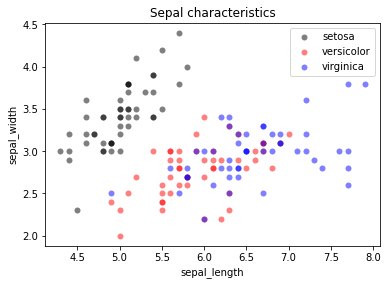

In [50]:
fig = plt.figure(figsize=(6,6))

# Loop on the species
for i, specy in enumerate(dataset['species'].unique()):
    # Plot feature 1 vs. feature 2
    plt.scatter(dataset[dataset['species']==specy][feature_x], dataset[dataset['species']==specy][feature_y], color = ['black', 'red', 'blue'][i], alpha=0.5, lw=0, label = specy)

# Figure style
plt.title('Sepal characteristics')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()
plt.axis('scaled')

plt.show()

### Train a k-Means model for 3 clusters and plot the results

**Prepare the predictors:**

In [51]:
X = dataset[[feature_x, feature_y]]
X.sample(n=6)

,sepal_length,sepal_width
39,5.1,3.4
21,5.1,3.7
136,6.3,3.4
33,5.5,4.2
58,6.6,2.9
129,7.2,3.0


**Feature scaling:**

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

**K-means clustering:**

In [53]:
k = 3

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [54]:
y_pred = kmeans.predict(X)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 0 0 0 0 2 2 2 2 2 2 2 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 2 0 0
 2 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 2 0 0 0 2 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


**Plot the results:**

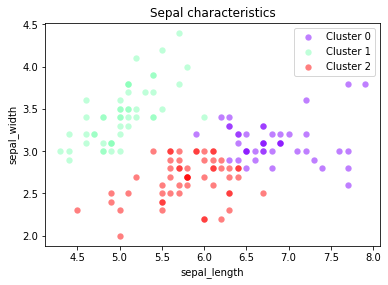

In [55]:
fig = plt.figure(figsize=(6,6))

# Prepare a list of colors
color_list = plt.cm.get_cmap('rainbow', k)
  
# Plot data points with color corresponding to their cluster attribution
for i in range(k):
    plt.scatter(dataset[y_pred == i][feature_x], dataset[y_pred == i][feature_y], s = 40, color=color_list(i), alpha=0.5, lw=0, label='Cluster '+str(i))

    
plt.title('Sepal characteristics')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()
plt.axis('scaled')

plt.show()

### Train a Hierarchical Clustering model for 3 clusters and plot the results

**Dendograms:**

Let's first check the dendograms with different linkage methods.

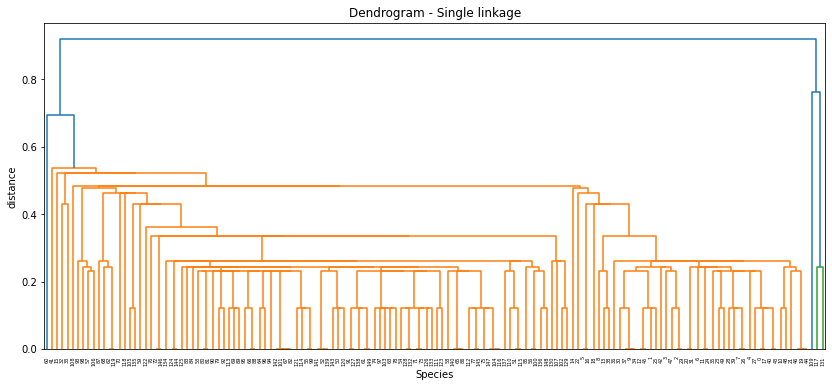

In [67]:
from scipy.cluster import hierarchy
plt.figure(figsize=(14,6))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'single'))
plt.title('Dendrogram - Single linkage')
plt.xlabel('Species')
plt.ylabel('distance')
plt.show()

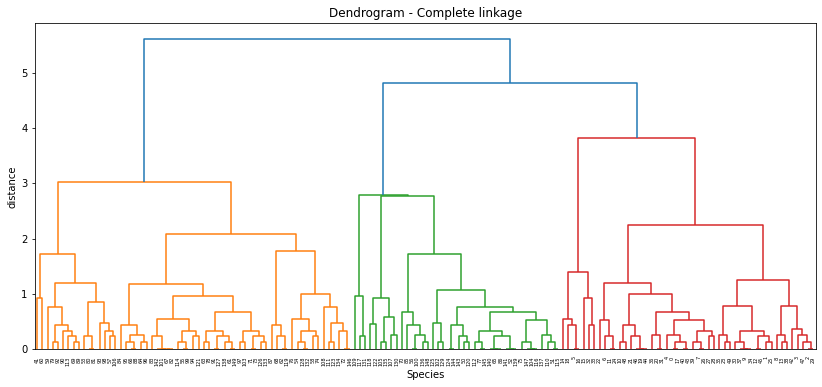

In [68]:
plt.figure(figsize=(14,6))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'complete'))
plt.title('Dendrogram - Complete linkage')
plt.xlabel('Species')
plt.ylabel('distance')
plt.show()

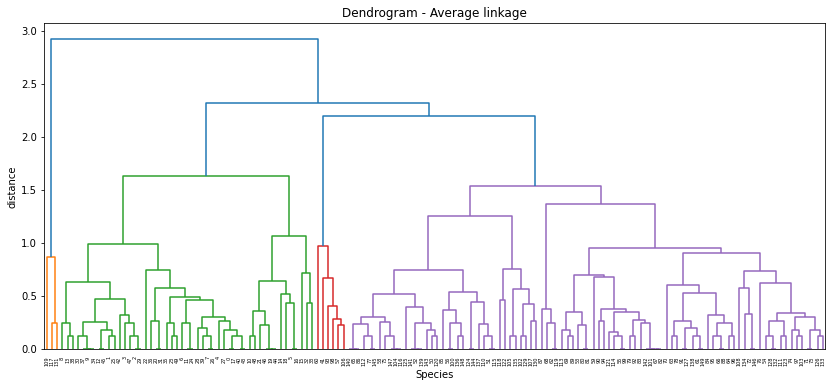

In [69]:
plt.figure(figsize=(14,6))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'average'))
plt.title('Dendrogram - Average linkage')
plt.xlabel('Species')
plt.ylabel('distance')
plt.show()

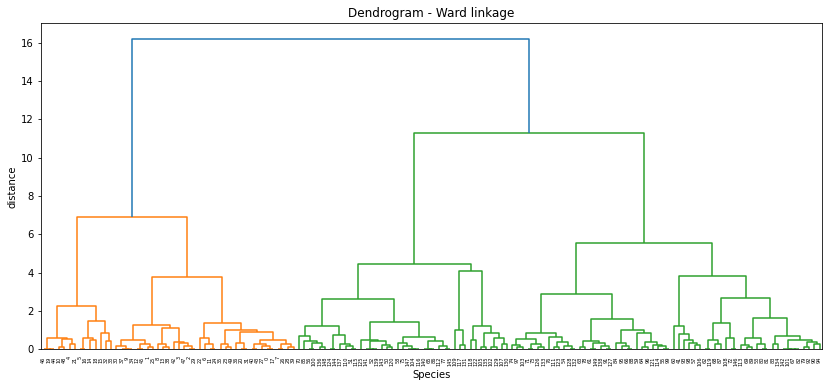

In [70]:
plt.figure(figsize=(14,6))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'ward'))
plt.title('Dendrogram - Ward linkage')
plt.xlabel('Species')
plt.ylabel('distance')
plt.show()

**Hierarchical clustering:**

Let's apply the hierarchical clustering with complete and ward linkages.

In [81]:
from sklearn.cluster import AgglomerativeClustering

hc_1 = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'complete')
hc_2 = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')

**Plot the results:**

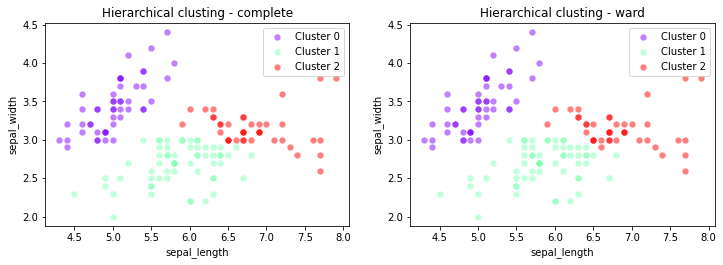

In [82]:
fig, axs = plt.subplots(1,2, figsize=(6*2,6))

# Prepare a list of colors
color_list = plt.cm.get_cmap('rainbow', k)

# Loop on each linkage method
for i_method, hc_i in enumerate([hc_1, hc_2]):
    y_pred_i = hc_i.fit_predict(X)
    linkage_i = hc_i.linkage
    
    # Plot data points with color corresponding to their cluster attribution
    for i in range(k):
        axs[i_method].scatter(dataset[y_pred_i == i][feature_x], dataset[y_pred_i == i][feature_y], s = 40, color=color_list(i), alpha=0.5, lw=0, label='Cluster '+str(i))
        axs[i_method].set_title('Hierarchical clusting - ' + linkage_i)
        axs[i_method].set_xlabel(feature_x)
        axs[i_method].set_ylabel(feature_y)
        axs[i_method].legend()
        axs[i_method].axis('scaled')
    
plt.show()

### Do again the first three steps now with **petal width** vs. **petal length**

In [83]:
# Define feature 1 and feature 2
feature_x = 'petal_length'
feature_y = 'petal_width'

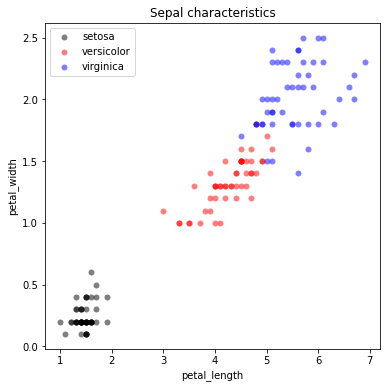

In [84]:
fig = plt.figure(figsize=(6,6))
       
# Loop on the species
for i, specy in enumerate(dataset['species'].unique()):
    # Plot feature 1 vs. feature 2
    plt.scatter(dataset[dataset['species']==specy][feature_x], dataset[dataset['species']==specy][feature_y], color = ['black', 'red', 'blue'][i], alpha=0.5, lw=0, label = specy)

# Figure style
plt.title('Sepal characteristics')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()
# plt.axis('scaled')

plt.show()

**Prepare the predictors:**

In [85]:
X = dataset[[feature_x, feature_y]]
X.sample(n=6)

,petal_length,petal_width
72,4.9,1.5
7,1.5,0.2
10,1.5,0.2
19,1.5,0.3
117,6.7,2.2
86,4.7,1.5


**Feature scaling:**

In [86]:
sc = StandardScaler()
X = sc.fit_transform(X)

**K-mean clustering:**

In [87]:
k = 3

kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [88]:
y_pred = kmeans.predict(X)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


**Plot the results:**

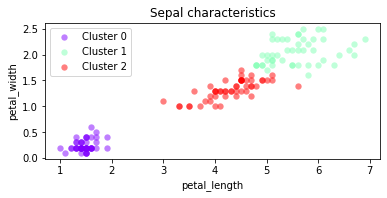

In [89]:
fig = plt.figure(figsize=(6,6))

# Prepare a list of colors
color_list = plt.cm.get_cmap('rainbow', k)
  
# Plot data points with color corresponding to their cluster attribution
for i in range(k):
    plt.scatter(dataset[y_pred == i][feature_x], dataset[y_pred == i][feature_y], s = 40, color=color_list(i), alpha=0.5, lw=0, label='Cluster '+str(i))

    
plt.title('Sepal characteristics')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()
plt.axis('scaled')

plt.show()

### Train a Hierarchical Clustering model for 3 clusters and plot the results

**Dendograms:**

Let's first check the dendograms with different linkage methods.

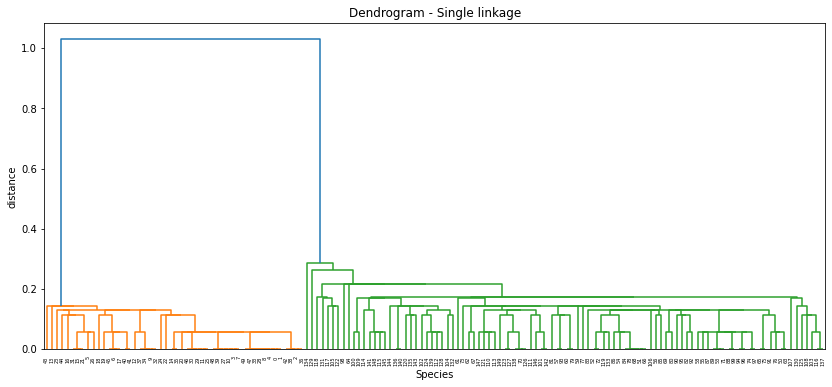

In [90]:
from scipy.cluster import hierarchy
plt.figure(figsize=(14,6))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'single'))
plt.title('Dendrogram - Single linkage')
plt.xlabel('Species')
plt.ylabel('distance')
plt.show()

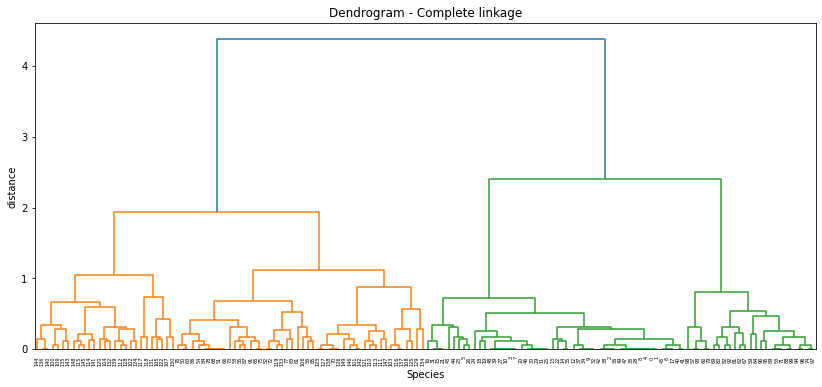

In [91]:
plt.figure(figsize=(14,6))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'complete'))
plt.title('Dendrogram - Complete linkage')
plt.xlabel('Species')
plt.ylabel('distance')
plt.show()

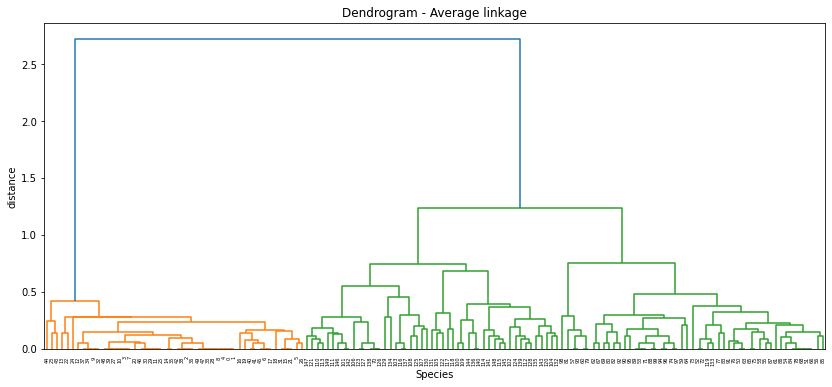

In [92]:
plt.figure(figsize=(14,6))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'average'))
plt.title('Dendrogram - Average linkage')
plt.xlabel('Species')
plt.ylabel('distance')
plt.show()

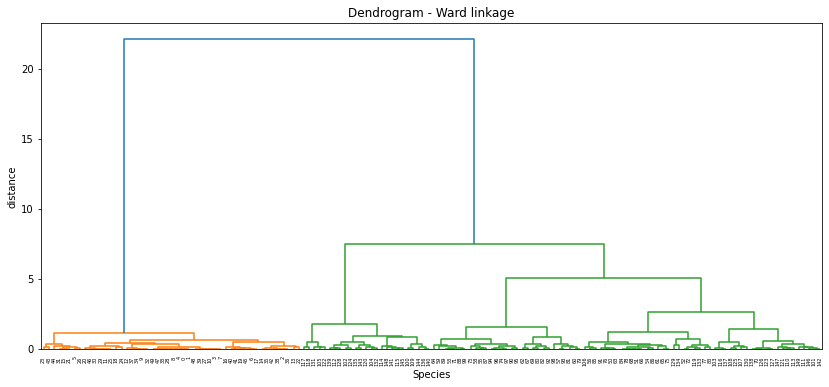

In [93]:
plt.figure(figsize=(14,6))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'ward'))
plt.title('Dendrogram - Ward linkage')
plt.xlabel('Species')
plt.ylabel('distance')
plt.show()

**Hierarchical clustering:**

Let's apply the hierarchical clustering with complete and ward linkages.

In [98]:
from sklearn.cluster import AgglomerativeClustering

hc_1 = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'average')
hc_2 = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')

**Plot the results:**

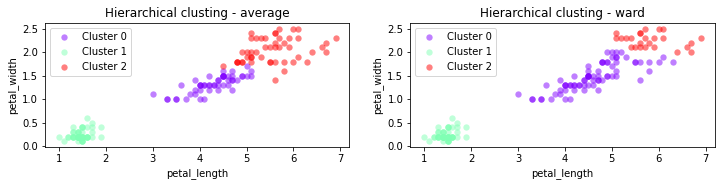

In [99]:
fig, axs = plt.subplots(1,2, figsize=(6*2,6))

# Prepare a list of colors
color_list = plt.cm.get_cmap('rainbow', k)

# Loop on each linkage method
for i_method, hc_i in enumerate([hc_1, hc_2]):
    y_pred_i = hc_i.fit_predict(X)
    linkage_i = hc_i.linkage
    
    # Plot data points with color corresponding to their cluster attribution
    for i in range(k):
        axs[i_method].scatter(dataset[y_pred_i == i][feature_x], dataset[y_pred_i == i][feature_y], s = 40, color=color_list(i), alpha=0.5, lw=0, label='Cluster '+str(i))
        axs[i_method].set_title('Hierarchical clusting - ' + linkage_i)
        axs[i_method].set_xlabel(feature_x)
        axs[i_method].set_ylabel(feature_y)
        axs[i_method].legend()
        axs[i_method].axis('scaled')
    
plt.show()

### Visually, which 2D plane seems to be the most convenient for clustering?

Visually, the plane sepal_length/sepal_width is more subject to class interlacing whereas the plane petal_length/petal_width offers more class separation. This latter plane has shown to give better results for computing a clustering.

### Extension: Clustering in 4 dimensions

In [100]:
X = dataset.drop('species', axis=1)
X.sample(n=6)

,sepal_length,sepal_width,petal_length,petal_width
44,5.1,3.8,1.9,0.4
13,4.3,3.0,1.1,0.1
64,5.6,2.9,3.6,1.3
92,5.8,2.6,4.0,1.2
124,6.7,3.3,5.7,2.1
34,4.9,3.1,1.5,0.1


In [101]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [102]:
k = 3

kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [108]:
# Define feature 1 and feature 2 (for the visualization only)
# feature_x = 'sepal_length'
# feature_y = 'sepal_width'
feature_x = 'petal_length'
feature_y = 'petal_width'

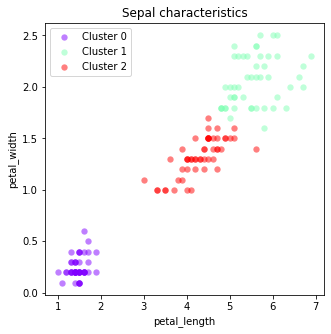

In [107]:
fig = plt.figure(figsize=(5,5))

# Prepare a list of colors
color_list = plt.cm.get_cmap('rainbow', k)
  
# Plot data points with color corresponding to their cluster attribution
for i in range(k):
    plt.scatter(dataset[y_pred == i][feature_x], dataset[y_pred == i][feature_y], s = 40, color=color_list(i), alpha=0.5, lw=0, label='Cluster '+str(i))

    
plt.title('Sepal characteristics')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()
plt.show()